In [1]:
import os
import sys
import os.path

import random
import numpy as np

import torch
import torch.utils.data as data
from torch.utils.data import WeightedRandomSampler
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.autograd import Variable

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''load classes and functions'''
from dataset import ThermalDataset

In [3]:
train_root = 'C:/Users/mostayad/Desktop/yolo3/FLIR_ADAS_v2/images_thermal_train/data'
test_root = 'C:/Users/mostayad/Desktop/yolo3/FLIR_ADAS_v2/images_thermal_val/data'
#
'''annotation files'''
train_annot = 'C:/Users/mostayad/Desktop/yolo3/FLIR_ADAS_v2/FLIR_v2_2022_thermal_train.txt'
test_annot = 'C:/Users/mostayad/Desktop/yolo3/FLIR_ADAS_v2/FLIR_v2_2022_thermal_val.txt'
#
Transform = transforms.Compose([transforms.ToTensor()])     

In [4]:
'''data loader'''
image_size = 640
number_of_classes = 10

anchors = [[(54.,161.), (117.,107.), (165.,200.)], 
           [(28., 29.), (47., 45.), (27.,84.), (73.,71.)],
           [(13.,21.), (16.,47.), (28., 29.), (47., 45.)]
          ]
test_dataset = ThermalDataset(root = test_root, 
                              list_file = test_annot, 
                              image_size = image_size, 
                              anchors = anchors, 
                              #stack = False,
                              num_classes = number_of_classes,
                              train = True, 
                              transform = None)

test_loader = DataLoader(test_dataset, 
                          batch_size = 1, 
                          shuffle = True,
                          #sampler = train_sampler,
                          collate_fn = test_dataset.collate_fn,
                          num_workers = 0)

data init


In [5]:
#test_iter = iter(test_loader)
#for imgs, gt_boxes, _, _, _ in test_iter:
#    print('%%%%%%%%%%%%%%%%%%%%%%%%%')

In [6]:
test_iter = iter(test_loader)
imgs, gt_boxes, target, mask_obj, mask_no_obj = next(test_iter)

In [7]:
imgs = imgs[0].numpy()
gt_boxes = gt_boxes[:,1:]

In [8]:
imgs.shape

(640, 640, 3)

In [9]:
gt_boxes

tensor([[605., 153., 620., 190.,   6.],
        [ 60., 181.,  76., 217.,   6.],
        [ 76., 183.,  89., 219.,   6.],
        [460., 165., 475., 196.,   6.],
        [ 66., 149.,  80., 167.,   8.],
        [ 54., 255.,  70., 305.,   0.],
        [ 63., 258.,  71., 304.,   0.],
        [119., 256., 147., 304.,   0.],
        [127., 252., 151., 302.,   0.],
        [172., 252., 188., 296.,   0.],
        [295., 219., 510., 294.,   2.],
        [154., 249., 212., 293.,   2.],
        [193., 247., 231., 281.,   2.],
        [265., 251., 282., 265.,   2.],
        [  0., 263.,  31., 317.,   2.],
        [ 98., 274., 108., 300.,   7.]])

In [10]:
result =[]
for box in gt_boxes:
    x1 = int(box[0])
    x2 = int(box[2])
    y1 = int(box[1])
    y2 = int(box[3])
    cls_index = int(box[-1]) # convert LongTensor to int
    
    result.append([(x1,y1),(x2,y2)])

In [11]:
for left_up,right_bottom in result:
    color = [0, 128, 0]
    cv2.rectangle(imgs,left_up,right_bottom,color, 2)

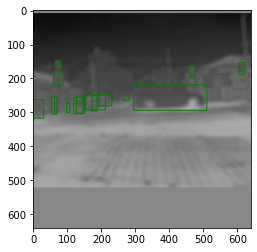

In [12]:
plt.imshow(imgs)